In [4]:
from rectangle_packing import *
from polygon_packing import *
from plotting import *

from matplotlib.animation import FuncAnimation
import random

%matplotlib inline

Optimal packing of objects in containers is a critical problem in various real-life and industrial applications. Many real-life situations require us to make decisions about optimally packing a collection of objects into a specific container. One particular category of these packing problems is two-dimensional packing, which is encountered in everyday scenarios like arranging items on a shelf and in industrial applications such as cutting cookies from rolled-out dough or manufacturing sets of tiles from standard-sized panels made of wood, glass, or metal. Another intriguing example involves cutting fabric pieces for clothing production. In this case, the pieces often cannot be rotated freely, as they must adhere to a desired pattern in the final product, which is tailored of multiple elements. The widespread applicability of two-dimensional packing problems has led to a surge of interest in designing efficient algorithms to address them. In this paper, we follow the line of research and study the problem of packing convex polygons without rotations in various settings depending on the type of containers used.

Finding fast and accurate algorithms for such packing problems has been proven to be notriously difficult and there are still many open questions even when all objects to pack are axis-parallel rectangles.

This is a demonstration of part of the algorithms from the paper "Improved Approximation Algorithms for Translational Packing of Polygons" by Adam Kurpisz and me, which we presented at the European Symposium on Algorithms (ESA) in 2023. All the results in this paper have been worked out as part of my Master's thesis at ETH Zurich.

The algorithm presented has an approximation gurantee of 9.44..., therefore significantly improving on the previously best known approximation algorithm with a guarantee of TODO.

# Next Fit Decreasing Height and First Fit Decreasing Height

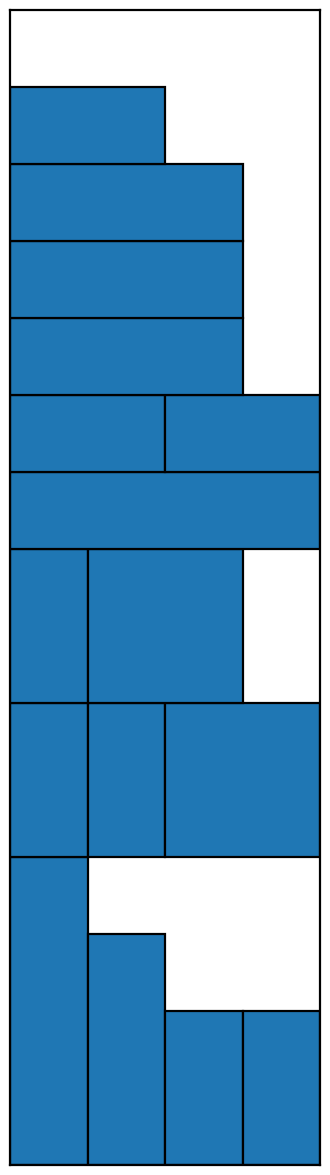

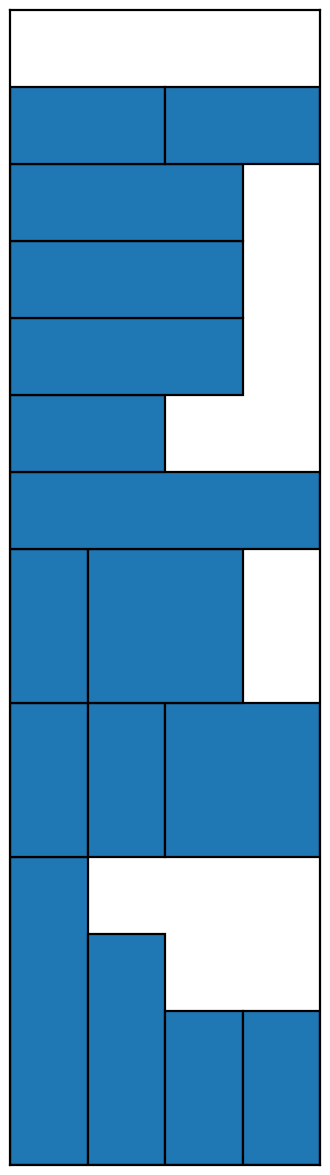

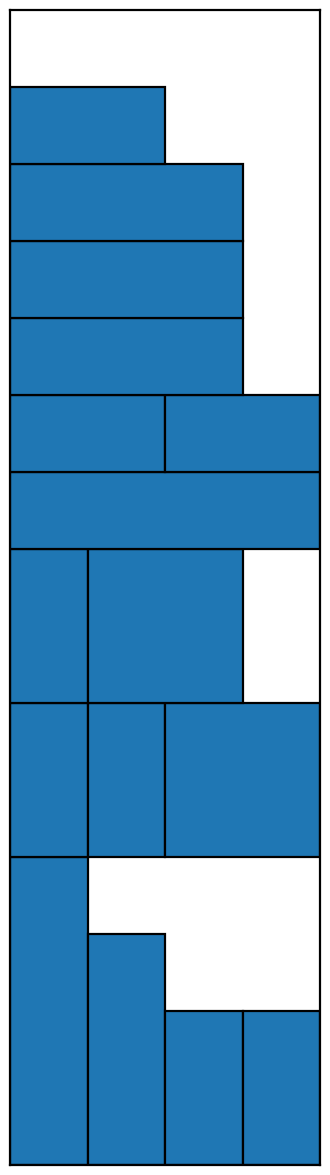

In [5]:
rectangles = [
    (1,2),
    (4,1),
    (2,1),
    (1,3),
    (3,1),
    (1,2),
    (3,1),
    (1,2),
    (3,1),
    (1,2),
    (2,1),
    (2,2),
    (1,2),
    (2,2),
    (1,4),
    (2,1)]

S_nfdh,h_S_nfdh = nfdh(rectangles,stripwidth=4)
S_ffdh,h_S2_ffdh = ffdh(rectangles,stripwidth=4)

nfdh_placed = calc_coords_of_shelf_packing(S_nfdh,h_S_nfdh)
plot_rectangles(nfdh_placed, size_scaling = 1, binsize = (4,15))

ffdh_placed = calc_coords_of_shelf_packing(S_ffdh,h_S2_ffdh)
plot_rectangles(ffdh_placed, size_scaling = 1, binsize = (4,15))

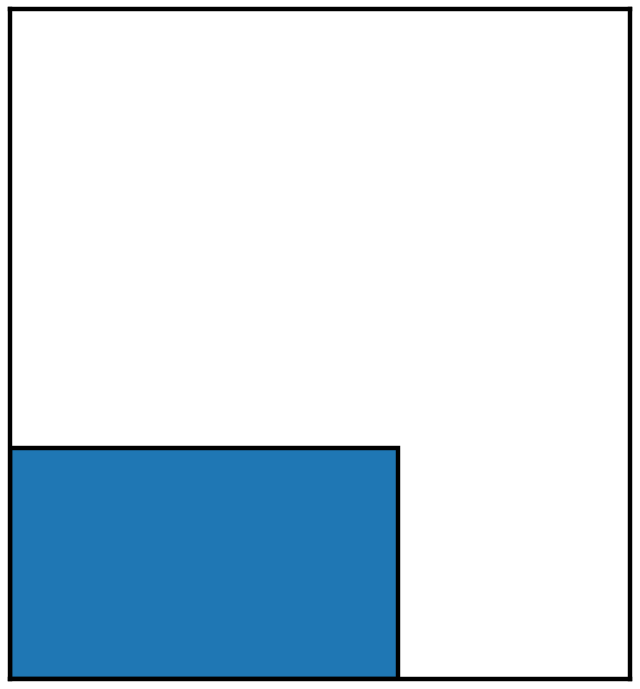

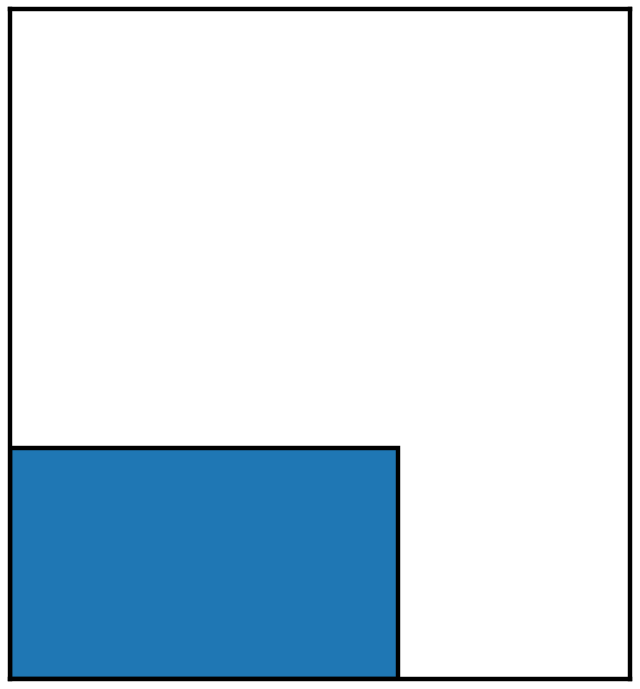

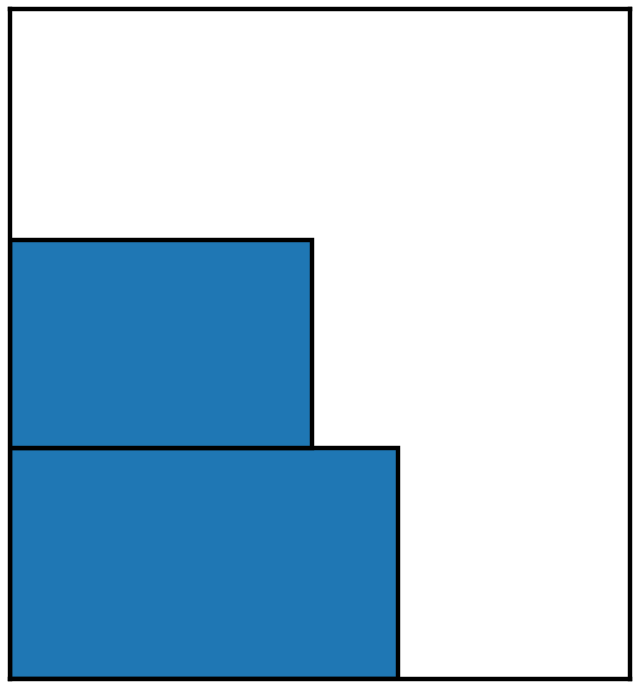

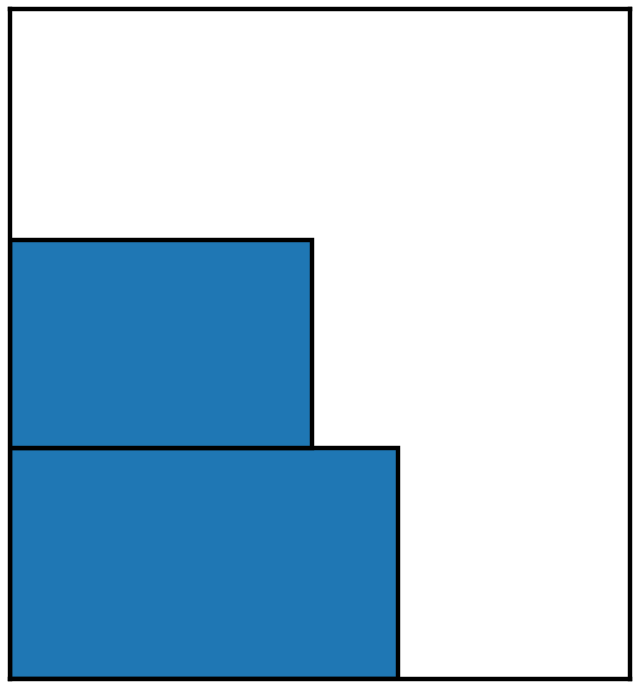

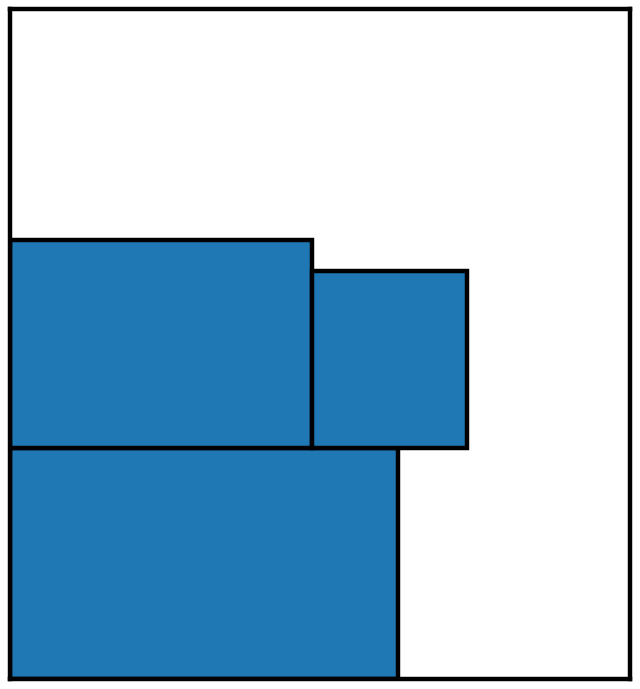

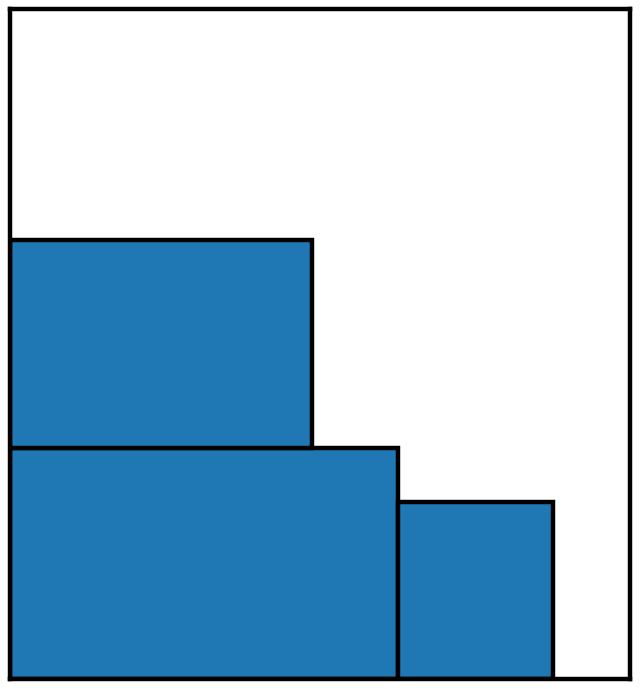

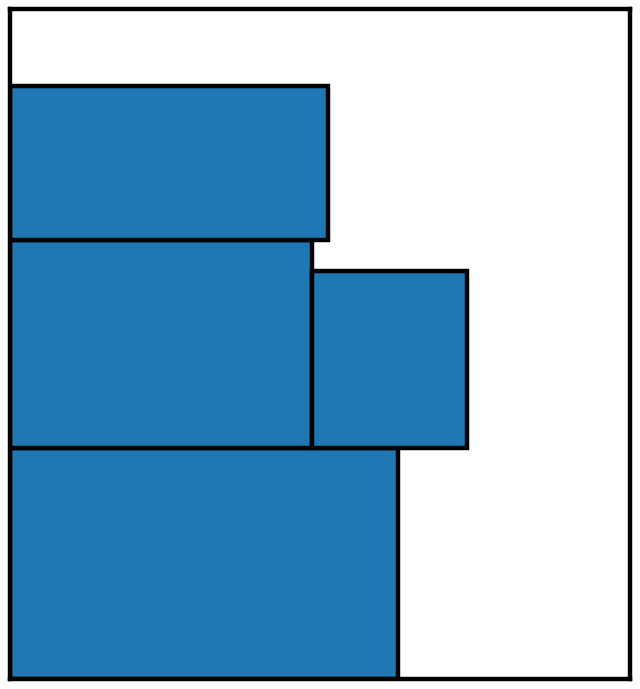

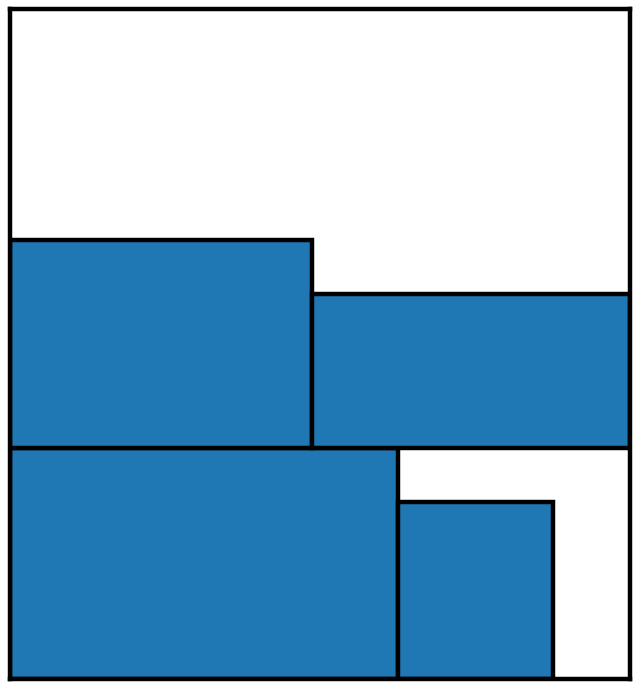

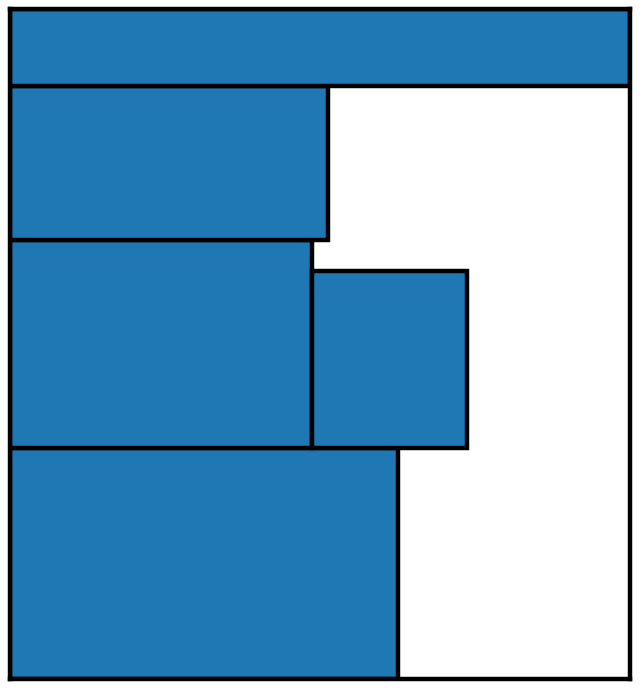

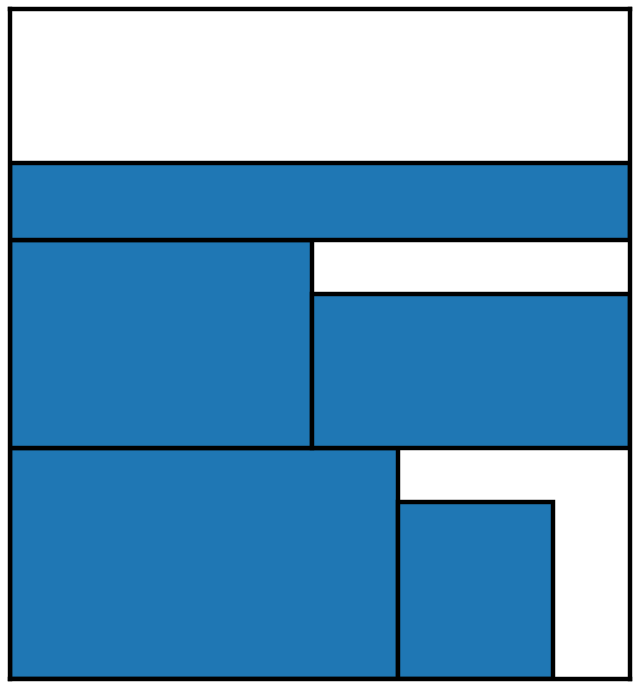

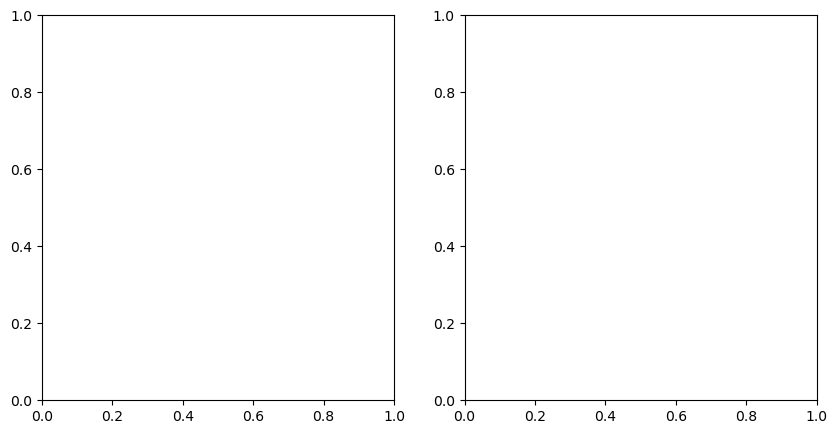

In [6]:
#nfdh ffdh algo explanation and differences

rectangles = [(5,3),(3.9,2.7),(2,2.3),(4.1,2),(8,1)]

S_nfdh,h_S_nfdh,rect_map = nfdh(rectangles,stripwidth=8,return_map=True)
rectangles_placed_nfdh = calc_coords_of_shelf_packing(S_nfdh,h_S_nfdh)
#plot_rectangles(rectangles_placed_nfdh, figure_size = (5,5), binsize = (8,8.7))

rectangles_it = [rectangles[:i] for i in range(1,6)]

S_nfdh_it = []
h_S_nfdh_it = []
S_ffdh_it = []
h_S_ffdh_it = []

for i in range(5):
    S_nfdh,h_S_nfdh,rect_map = nfdh(rectangles_it[i],stripwidth=8,return_map=True)
    S_ffdh,h_S_ffdh = ffdh(rectangles_it[i],stripwidth=8)
    S_nfdh_it.append(S_nfdh)
    h_S_nfdh_it.append(h_S_nfdh)
    S_ffdh_it.append(S_ffdh)
    h_S_ffdh_it.append(h_S_ffdh)

rectangles_placed_nfdh_it = [0]*5
rectangles_placed_ffdh_it = [0]*5

for i in range(5):
    rectangles_placed_nfdh_it[i] = calc_coords_of_shelf_packing(S_nfdh_it[i],h_S_nfdh_it[i])
    rectangles_placed_ffdh_it[i] = calc_coords_of_shelf_packing(S_ffdh_it[i],h_S_ffdh_it[i])

figures_nfdh = []
figures_ffdh = []

for i in range(5):
    figures_nfdh.append(plot_rectangles(rectangles_placed_nfdh_it[i], size_scaling=1, binsize=(8, 8.7)))
    figures_ffdh.append(plot_rectangles(rectangles_placed_ffdh_it[i], size_scaling=1, binsize=(8, 8.7)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

def update_frame(i):
    ax1.clear()
    ax2.clear()

    # Plot i-th element of figures_nfdh in ax1
    ax1.imshow(figures_nfdh[i])
    ax1.set_title(f'Figure 1 - Frame {i+1}')

    # Plot i-th element of figures_ffdh in ax2
    ax2.imshow(figures_ffdh[i])
    ax2.set_title(f'Figure 2 - Frame {i+1}')

    # Set any other customization you need for the subplots

# Set the interval (in milliseconds) between frames
interval = 1000  # 1 second

# Create the animation
animation = FuncAnimation(fig, update_frame, frames=len(figures_nfdh), interval=interval, repeat=False)

# Display the animation
plt.show()

# Packing Polygons into Parallelograms

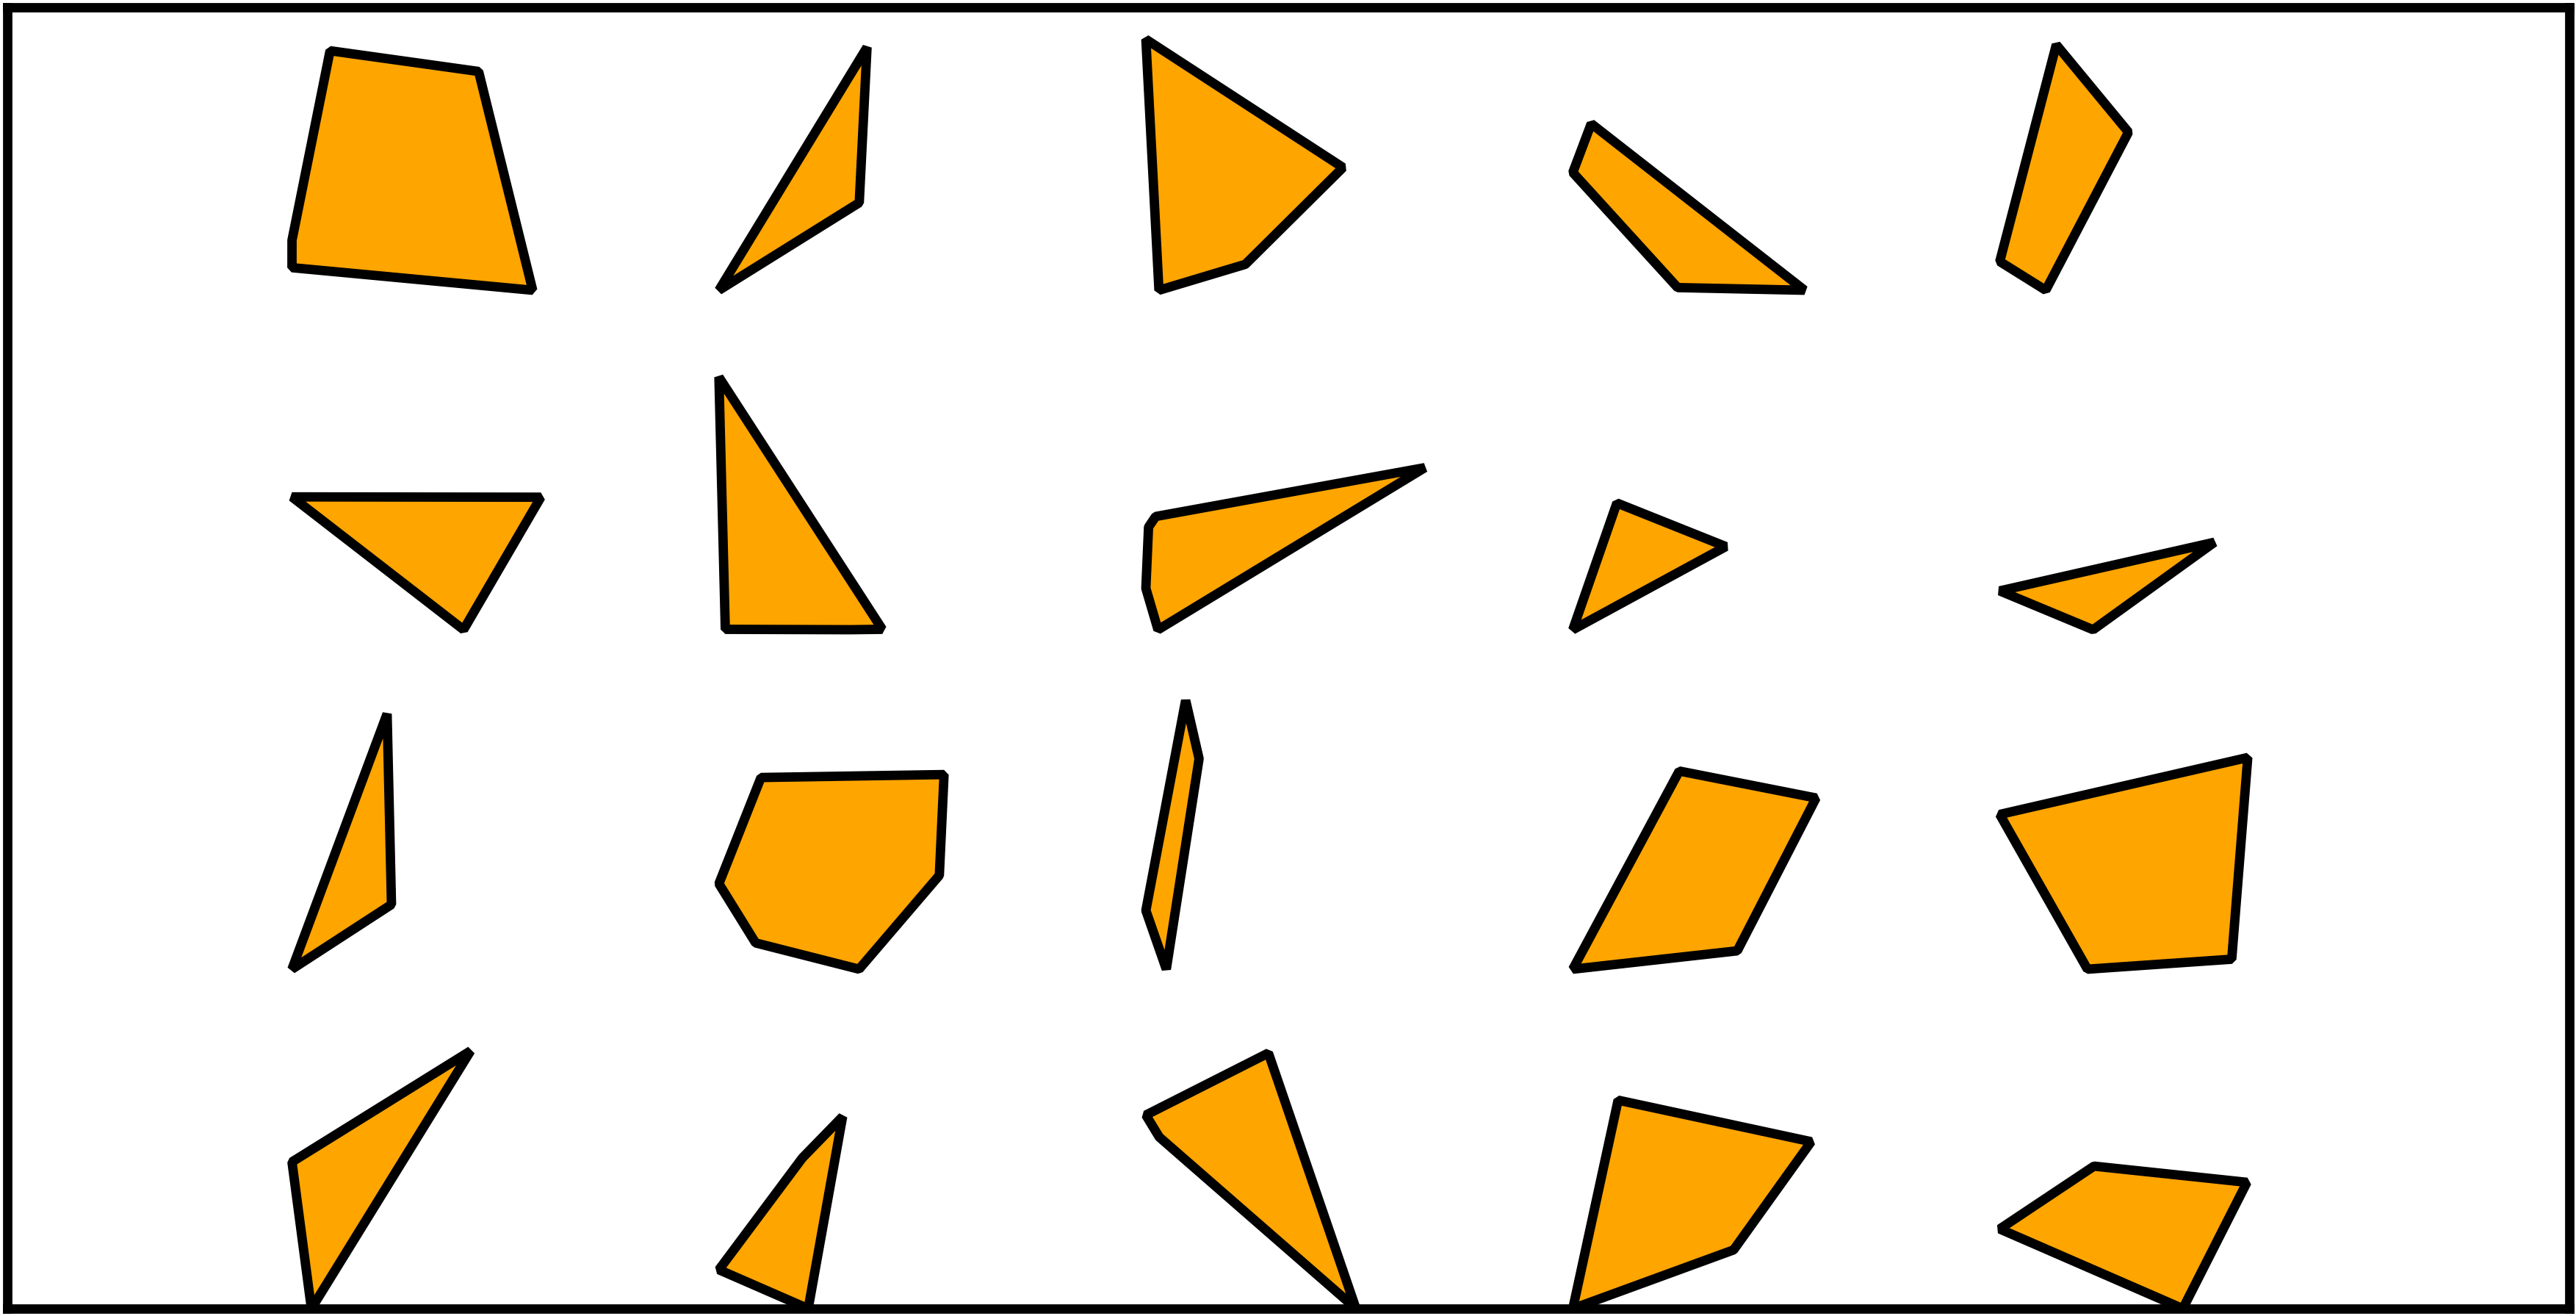

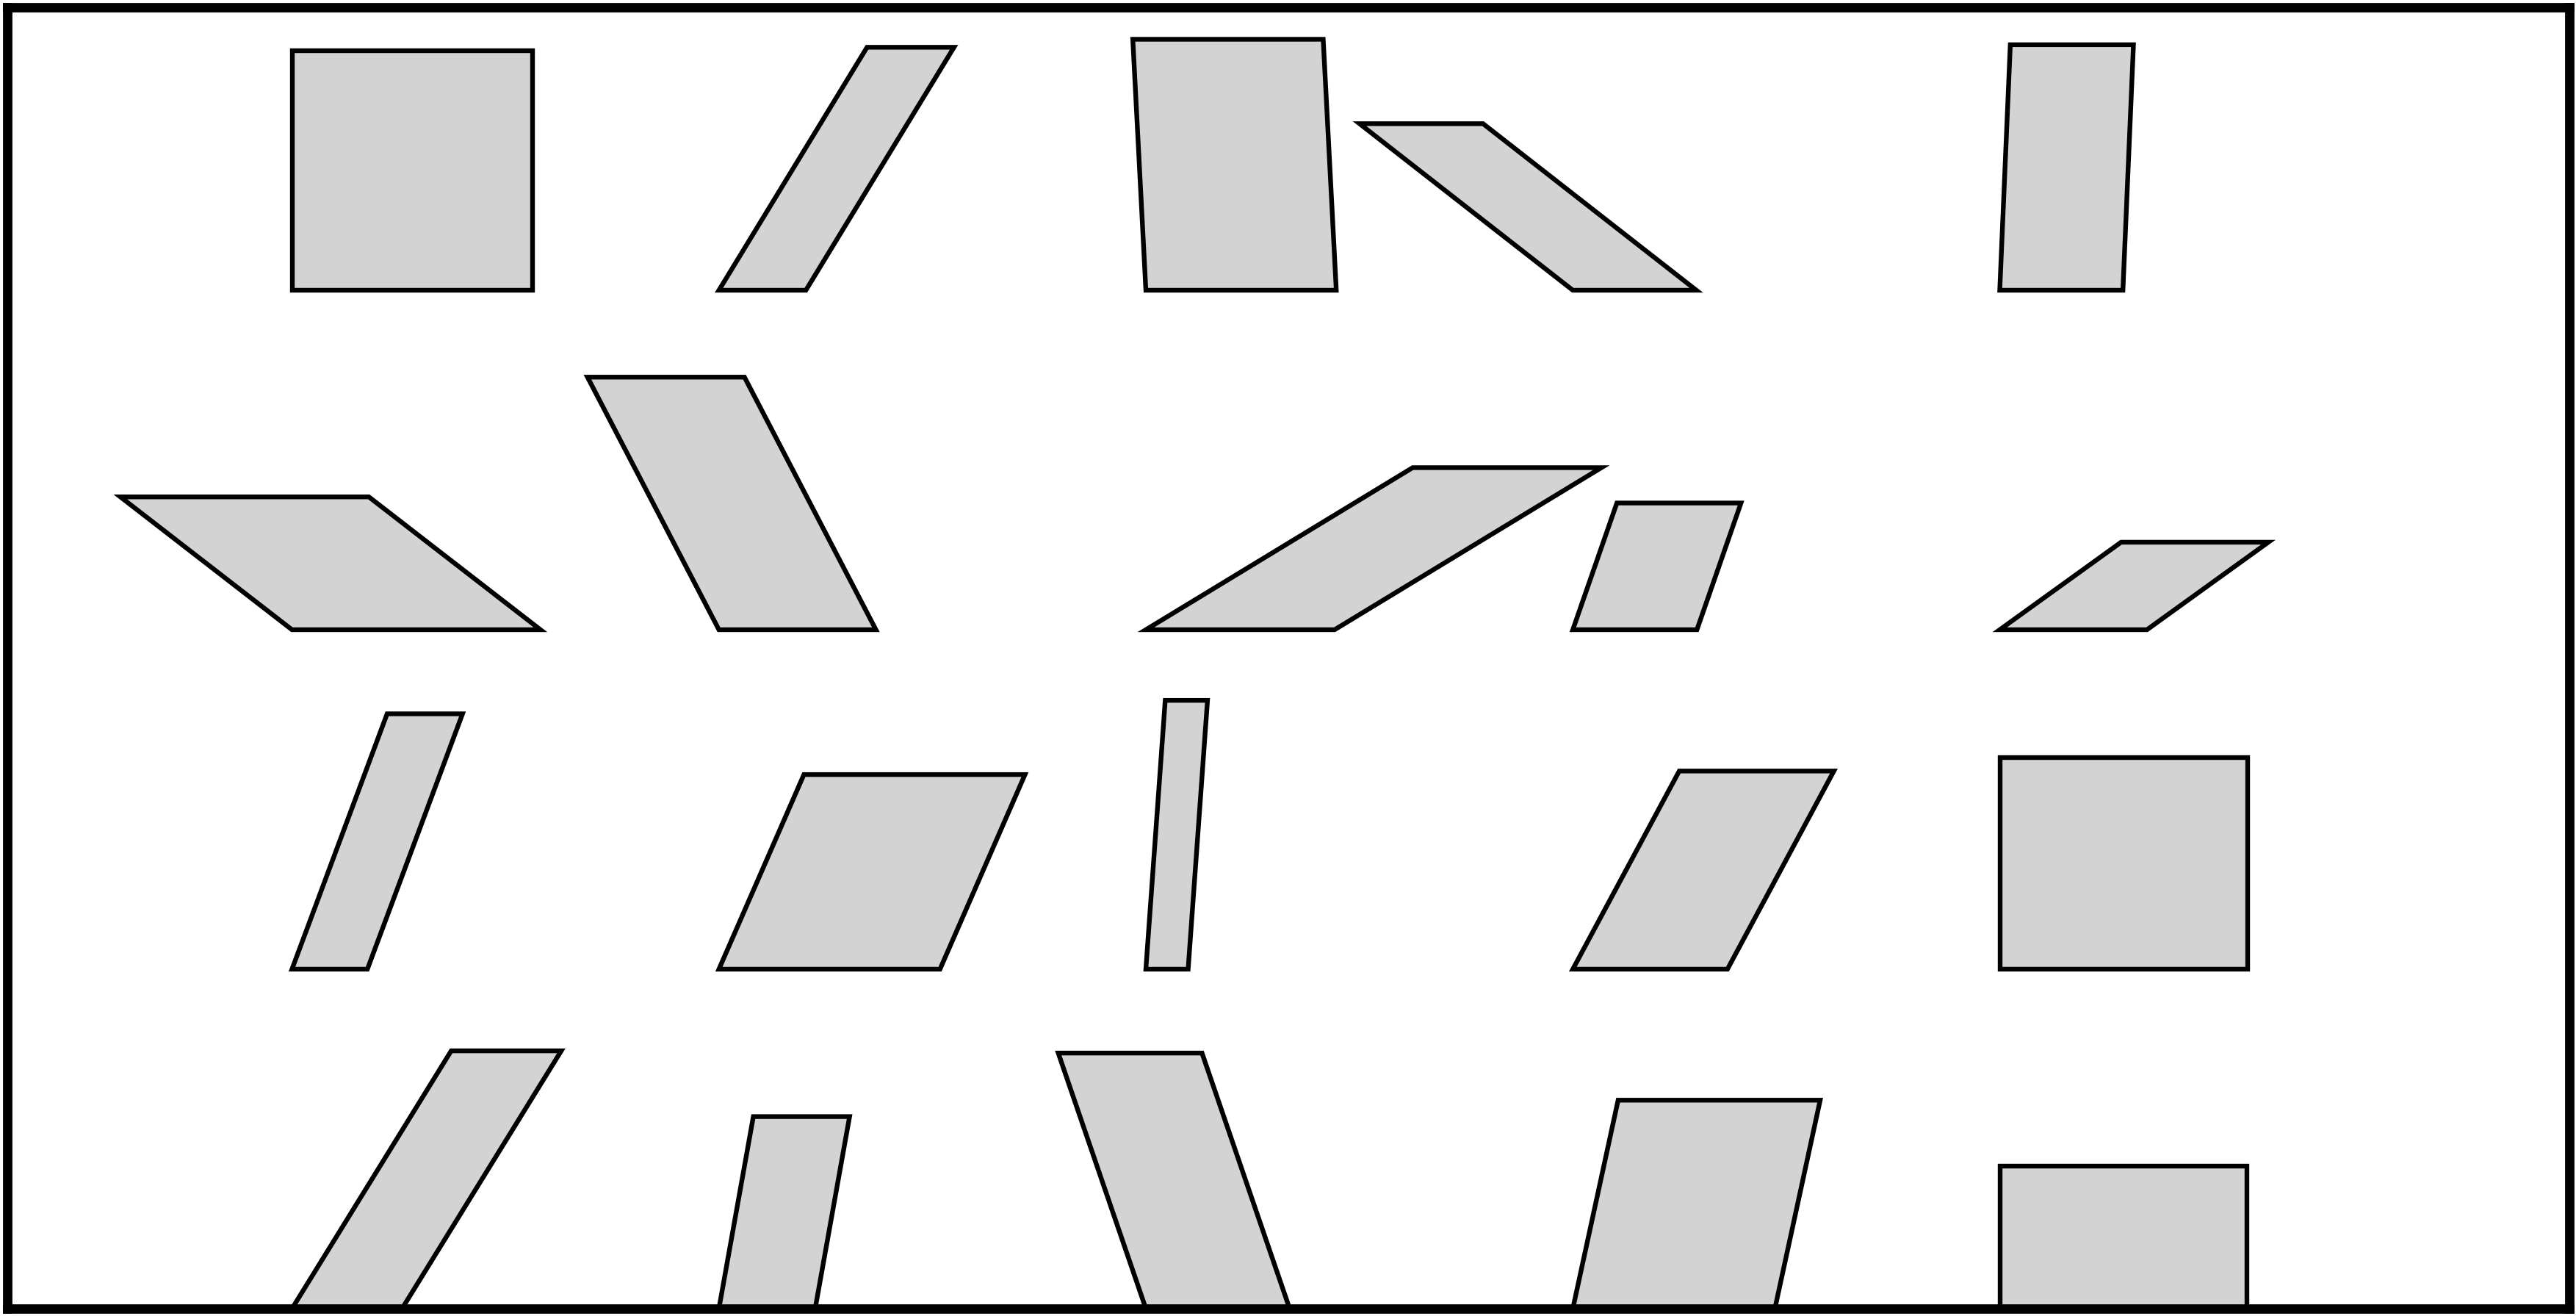

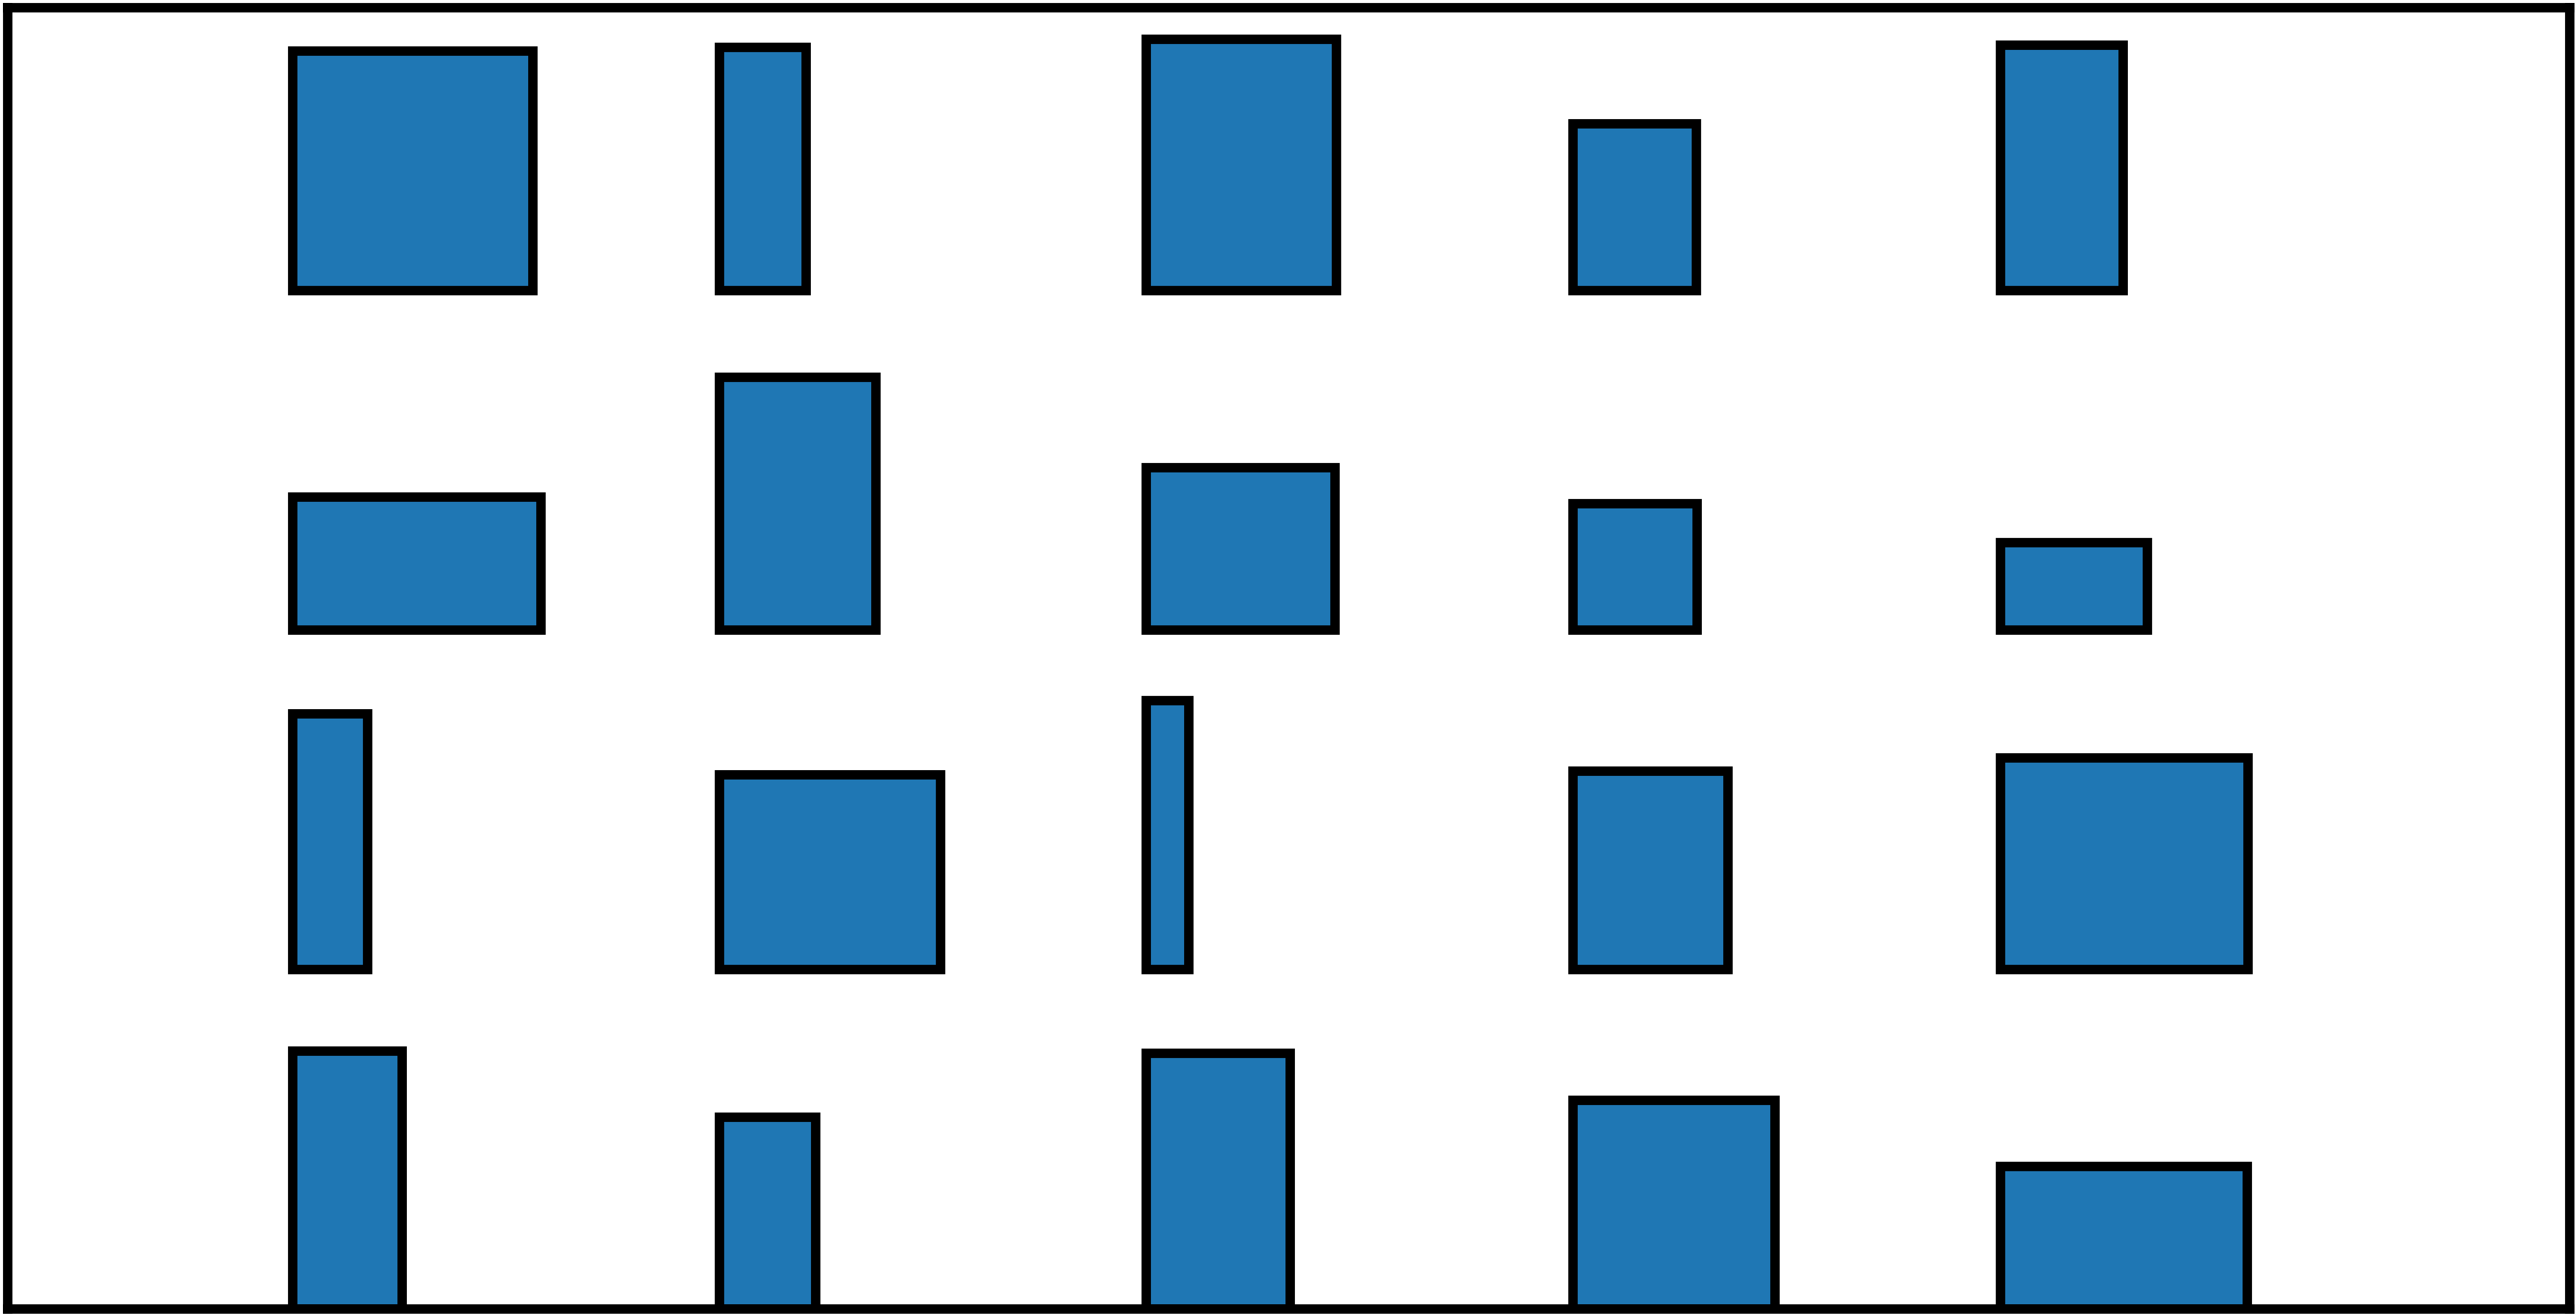

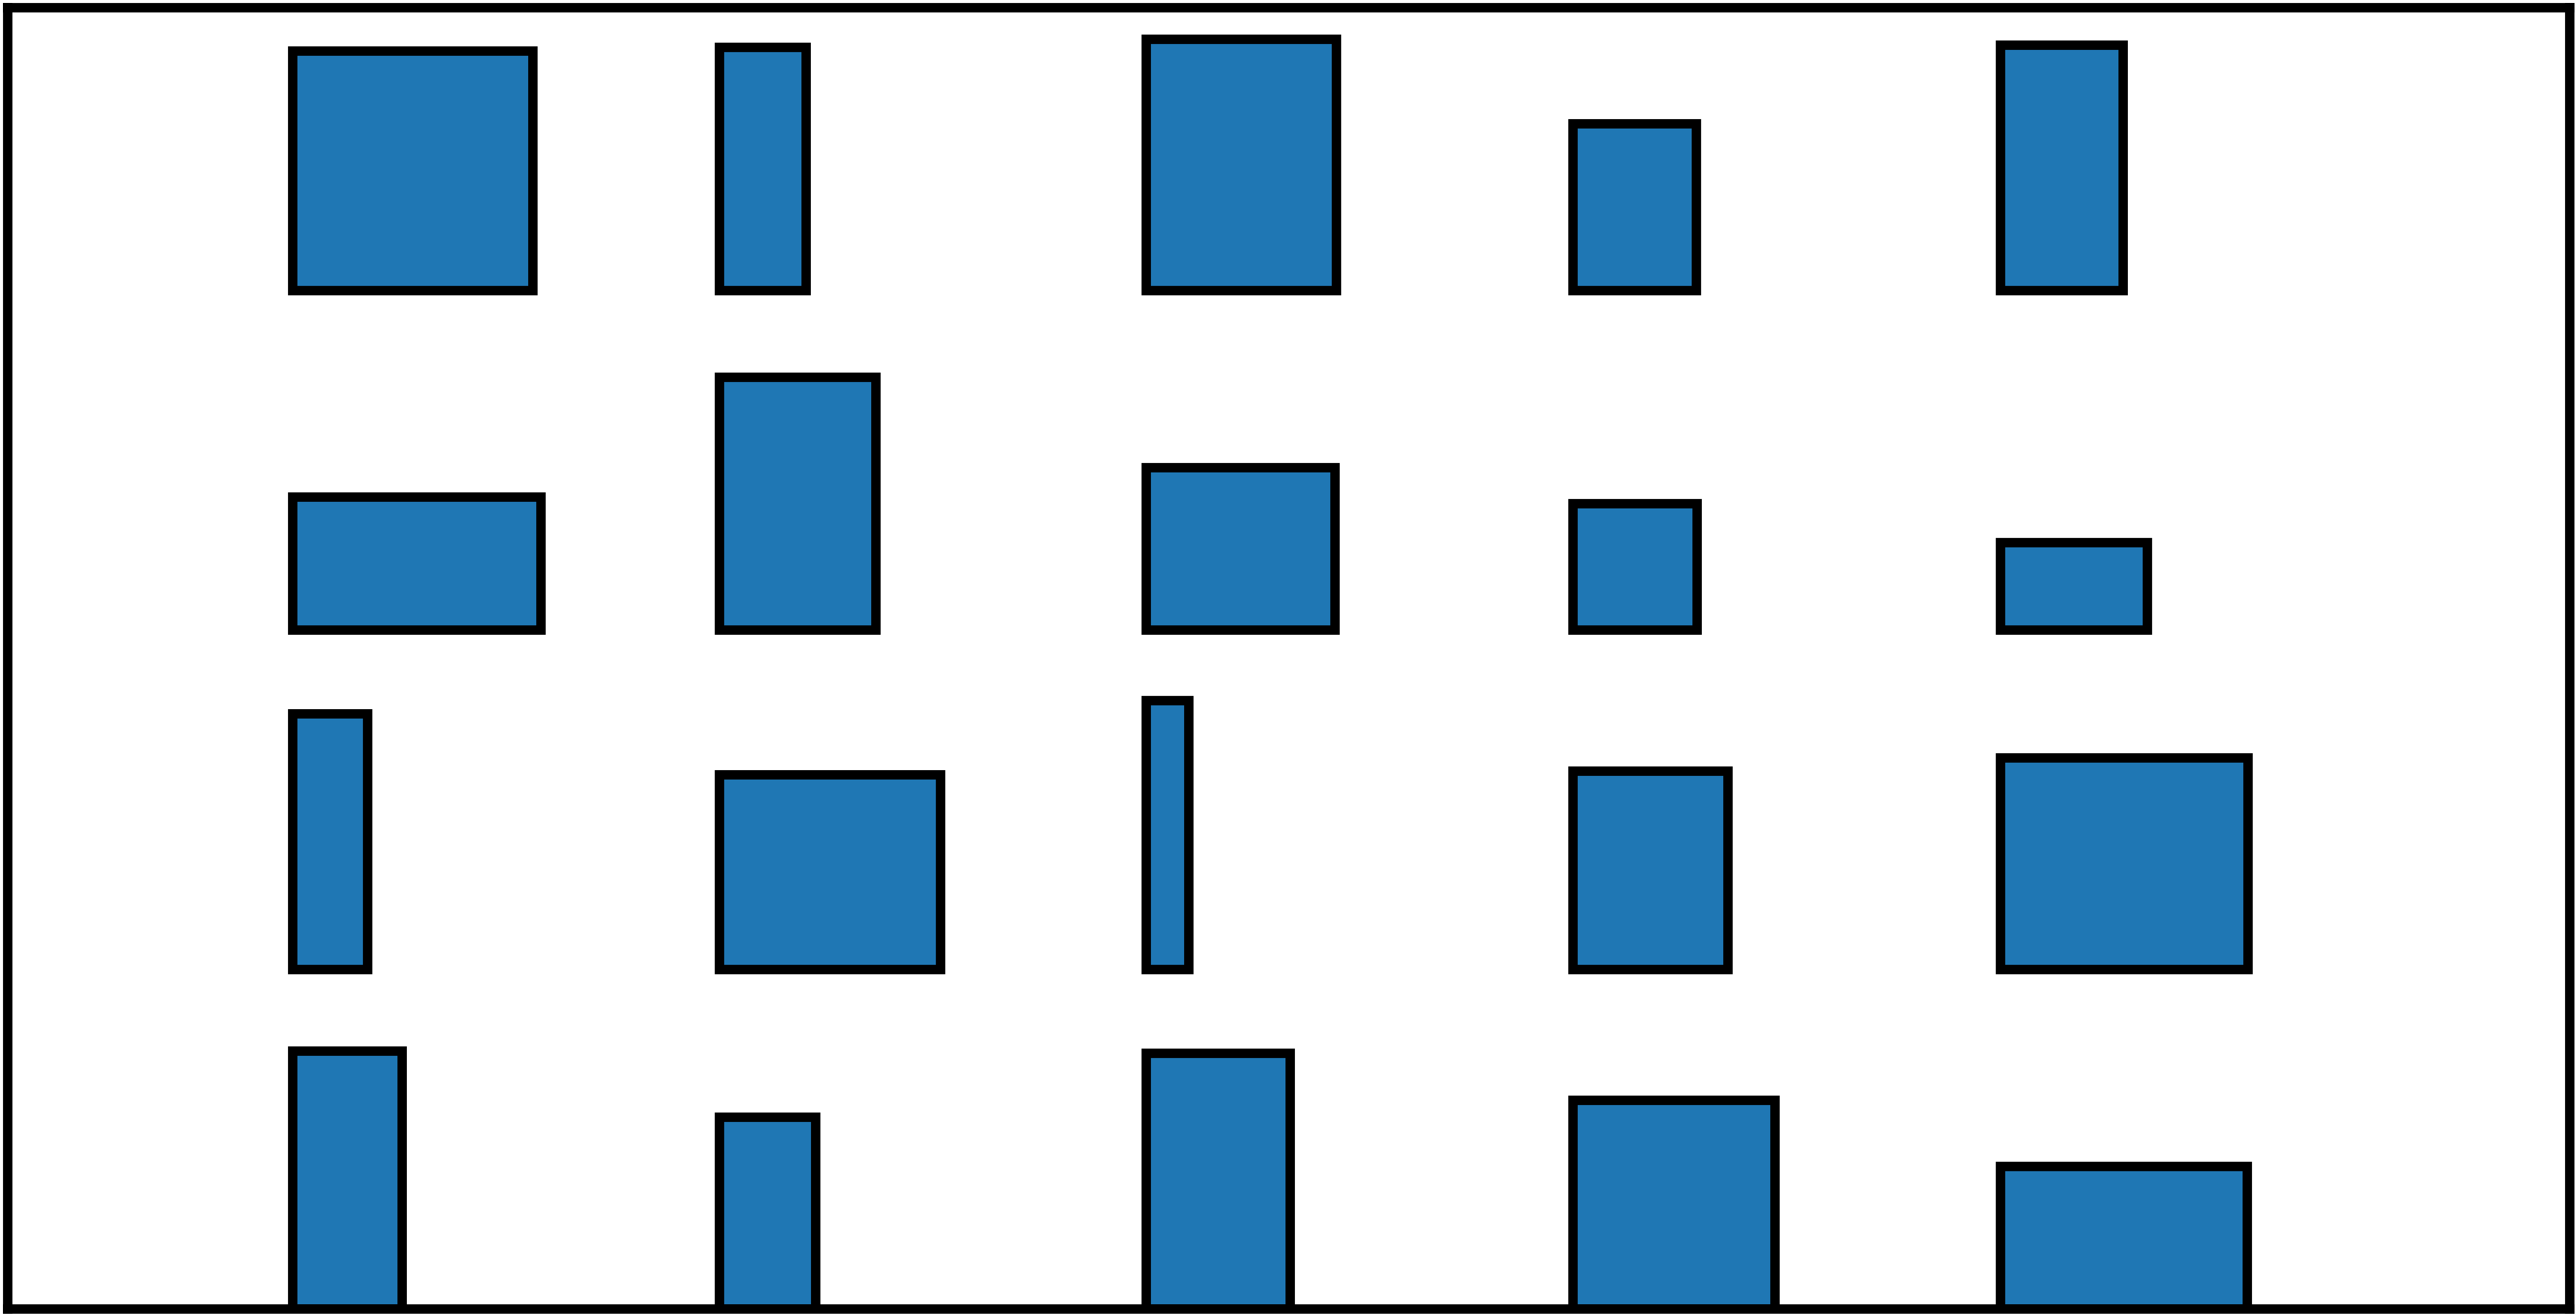

In [7]:
#doing it again, but packing into 4 rows
N = 10
c = 4
d = 1.5#horizontal dist btwn polys
h = 1.2 #vertical dist btwn polys

#good examples:
polygons1 = [[(0.0682616260192791, 0.0), (0.6277010177290963, 0.9113619559391828), (0.0, 0.5186622530597763)], [(0.31365183931877605, 0.0), (0.0, 0.13755604127842713), (0.4345781774871207, 0.6789356276185061), (0.2932220503089378, 0.5328343627807964)], [(0.4304040697006484, 0.9035177441462792), (0.0, 0.6842913404074804), (0.36821618336425355, 0.7844626606389811), (0.33025738481877154, 0.6861965543765075), (0.04695426755347554, 0.6065901452892588), (0.7382130183057866, 0.0), (0.07451833184468415, 0.698209296262137)], [(0.1591510292470555, 0.7369286401906034), (0.5648831434019963, 0.2076311194416236), (0.0, 0.0), (0.8374107516096795, 0.5902291788142738), (0.5547412046518954, 0.5178149505497495)], [(0.09382095765239518, 0.30858399403260706), (0.8684664944675061, 0.44661384537615545), (0.0, 0.2816229452220702), (0.6432435853785264, 0.0), (0.6999857975659337, 0.2530812014794719), (0.33121442113011723, 0.5038097027232603)], [(0.0, 0.0), (0.34959373822976325, 0.228641625729749), (0.3342539435767541, 0.9026541031996305)], [(0.4923500186379327, 0.0), (0.12888526327484495, 0.09285328421892025), (0.7909534559575293, 0.6879554168669371), (0.7744240295903106, 0.33176308362646023), (0.7385389149642635, 0.6571699947485697), (0.0, 0.3021047567338492), (0.1478091117649497, 0.6775611913348609)], [(0.18693447006173003, 0.7440076701816458), (0.0717862016710481, 0.0), (0.13981109722077312, 0.9502532352219105), (0.0, 0.20738294031684212)], [(0.4243985342069615, 0.5764724396845555), (0.0, 0.0), (0.3739498719842259, 0.7004372329696725), (0.5778791137618707, 0.06490617058408499), (0.4562831140341279, 0.5979803224391623), (0.8546518722022105, 0.6051916548428075)], [(0.6669224141006957, 0.06630073834073136), (0.8713198477304863, 0.7482317245585118), (0.3080625265299679, 0.0), (0.6822692241346293, 0.31892445380796297), (0.0, 0.547050294127981), (0.8149816069169575, 0.03526804151026108)]]
polygons3 = [[(0.0, 0.469534065513757), (0.6028535626240914, 0.0), (0.8743577170964869, 0.4684229597540974), (0.3946744525817216, 0.24924289945858114)], [(0.0, 0.8928324586985776), (0.573913706392391, 0.0014212775183308768), (0.46177090741086535, 0.0), (0.05465214533537943, 0.5365486686167388), (0.02242864381059162, 0.00132505838665109)], [(0.00937559839224078, 0.36287713596810967), (0.0, 0.14610423760240343), (0.9800737755839569, 0.5728634368184138), (0.03447457646494945, 0.40020438074802056), (0.04268670759596238, 0.0)], [(0.5376982009075879, 0.2939500680460605), (0.15480245559256667, 0.4478476926061826), (0.0, 0.0)], [(0.7542444110778797, 0.3092269342439099), (0.3279788134414977, 0.0), (0.0, 0.13726294803021932), (0.6537952249269661, 0.2785252211238286)], [(0.6557031184443545, 0.7733299634400512), (0.5599189280429401, 0.06827998186208462), (0.13380258143277712, 0.8466396646580018), (7.427861169384542e-05, 0.1767135471855238), (0.8457109023759679, 0.0), (0.5283763973989717, 0.17562202142535), (0.0, 0.07980705525829201)], [(0.0, 0.0), (0.4930194727852001, 0.3094412813661007), (0.34545673519218134, 0.5244323328983207), (0.5203464636287558, 0.8588137888716237), (0.16442378832564208, 0.10554127260248025)], [(0.04594948895460815, 0.0), (0.3493864929594467, 0.09157963314342188), (0.027848364793583213, 0.4593026570811932), (0.0, 0.8871004256697629), (0.043594528384697795, 0.6614075476251858), (0.6924468849417806, 0.43389611808288053)], [(0.8140925525345445, 0.0), (0.5320630038017278, 0.10031926347994624), (0.7443497360508512, 0.03154378145185588), (0.36820751279135744, 0.00938910128001924), (0.06470465123711155, 0.588798264958425), (0.0, 0.41614828392595404)], [(0.4521916604239721, 0.558731644726873), (0.0, 0.10149704518404801), (0.19862485280604547, 0.8678508296430112), (0.16156400520656777, 0.0)]]

polygons2 = polygons1[5:]
polygons1 = polygons1[:5]
polygons4 = polygons3[5:]
polygons3 = polygons3[:5]

polygons = polygons1 + polygons2 + polygons3 + polygons4

polygons_to_visualize1 = [[(a+i*d+1,b) for (a,b) in polygons1[i]] for i in range(len(polygons1))]
polygons_to_visualize2 = [[(a+i*d+1,b+1*h) for (a,b) in polygons2[i]] for i in range(len(polygons2))]
polygons_to_visualize3 = [[(a+i*d+1,b+2*h) for (a,b) in polygons3[i]] for i in range(len(polygons3))]
polygons_to_visualize4 = [[(a+i*d+1,b+3*h) for (a,b) in polygons4[i]] for i in range(len(polygons4))]

polygons_to_visualize = polygons_to_visualize1 + polygons_to_visualize2 + polygons_to_visualize3 + polygons_to_visualize4

visualize_polygons(polygons_to_visualize,binsize=(1+(N/2-1)*d+2,1+3*h))

#parallelograms:

parallelograms1 = []
parallelograms2 = []
parallelograms3 = []
parallelograms4 = []

for polygon in polygons1:
    parallelogram, delta_i = compute_bounding_parallelogram(polygon)
    parallelograms1 += [parallelogram]

for polygon in polygons2:
    parallelogram, delta_i = compute_bounding_parallelogram(polygon)
    parallelograms2 += [parallelogram]
    
for polygon in polygons3:
    parallelogram, delta_i = compute_bounding_parallelogram(polygon)
    parallelograms3 += [parallelogram]
    
for polygon in polygons4:
    parallelogram, delta_i = compute_bounding_parallelogram(polygon)
    parallelograms4 += [parallelogram]

parallelograms_to_visualize1 = []
parallelograms_to_visualize2 = []
parallelograms_to_visualize3 = []
parallelograms_to_visualize4 = []

for i in range(len(parallelograms1)):
    x_0 = i*d+1
    y_0 = 0
    base = parallelograms1[i][0]
    height = parallelograms1[i][1]
    wside = parallelograms1[i][2]
    parallelograms_to_visualize1 += [[(x_0,y_0),(x_0+base,y_0),(x_0+wside,y_0+height),(x_0+wside+base,y_0+height)]]
    
for i in range(len(parallelograms2)):
    x_0 = i*d+1
    y_0 = 1*h
    base = parallelograms2[i][0]
    height = parallelograms2[i][1]
    wside = parallelograms2[i][2]
    parallelograms_to_visualize2 += [[(x_0,y_0),(x_0+base,y_0),(x_0+wside,y_0+height),(x_0+wside+base,y_0+height)]]

for i in range(len(parallelograms3)):
    x_0 = i*d+1
    y_0 = 2*h
    base = parallelograms3[i][0]
    height = parallelograms3[i][1]
    wside = parallelograms3[i][2]
    parallelograms_to_visualize3 += [[(x_0,y_0),(x_0+base,y_0),(x_0+wside,y_0+height),(x_0+wside+base,y_0+height)]]

for i in range(len(parallelograms4)):
    x_0 = i*d+1
    y_0 = 3*h
    base = parallelograms4[i][0]
    height = parallelograms4[i][1]
    wside = parallelograms4[i][2]
    parallelograms_to_visualize4 += [[(x_0,y_0),(x_0+base,y_0),(x_0+wside,y_0+height),(x_0+wside+base,y_0+height)]]


parallelograms_to_visualize = parallelograms_to_visualize1 + parallelograms_to_visualize2 + parallelograms_to_visualize3 + parallelograms_to_visualize4

visualize_polygons([],bounding_parallelograms=parallelograms_to_visualize,binsize=(1+(N/2-1)*d+2,1+3*h))


#rectangles:
    
rectangles_to_visualize1 = []
rectangles_to_visualize2 = []
rectangles_to_visualize3 = []
rectangles_to_visualize4 = []

for i in range(len(parallelograms1)):
    rectangles_to_visualize1 += [((i*d+1,0),parallelograms1[i][0],parallelograms1[i][1])]

for i in range(len(parallelograms2)):
    rectangles_to_visualize2 += [((i*d+1,1*h),parallelograms2[i][0],parallelograms2[i][1])]

for i in range(len(parallelograms2)):
    rectangles_to_visualize3 += [((i*d+1,2*h),parallelograms3[i][0],parallelograms3[i][1])]

for i in range(len(parallelograms2)):
    rectangles_to_visualize4 += [((i*d+1,3*h),parallelograms4[i][0],parallelograms4[i][1])]

rectangles_to_visualize = rectangles_to_visualize1 + rectangles_to_visualize2 + rectangles_to_visualize3 + rectangles_to_visualize4

plot_rectangles(rectangles_to_visualize,size_scaling=5,binsize=(1+(N/2-1)*d+2,1+3*h))

# The Main Algorithm

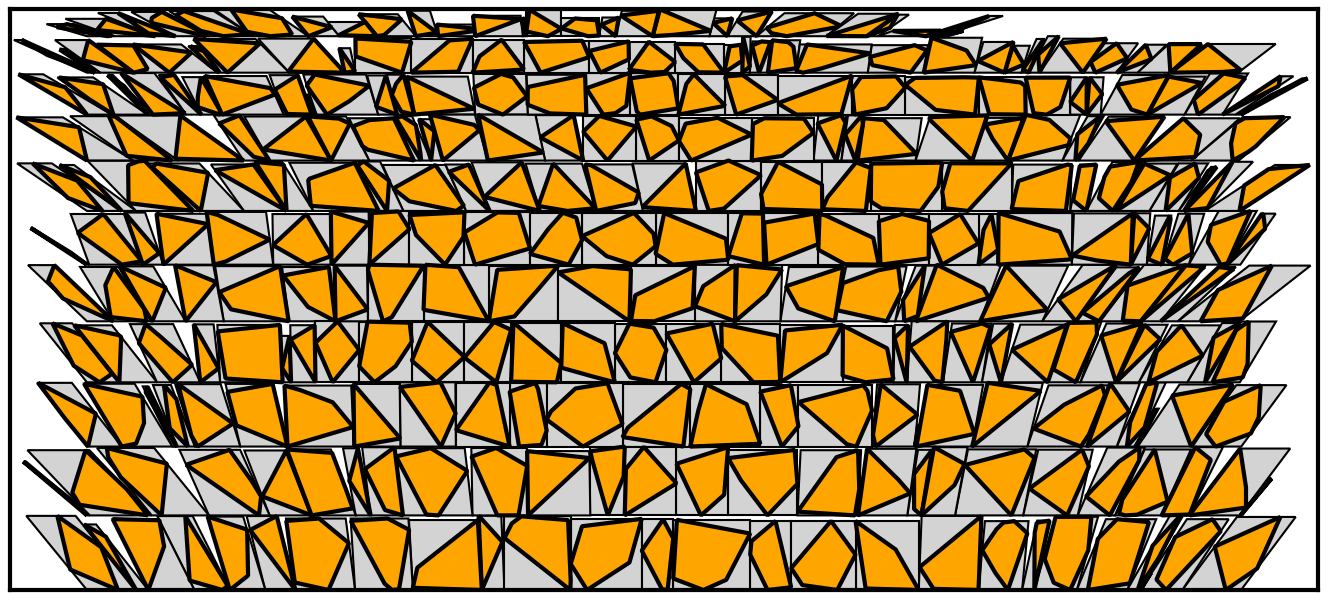

In [8]:
#new
N=300
c=15

random_polygons = [[(random.random()/5,random.random()/5) for j in range(random.randint(3,7))] for i in range(N)]

random_polygons = [left_bottom_adjust_polygon(polygon) for polygon in random_polygons]

packed_random_polygons, packed_random_polygons_bounding_parallelograms, width, height, shelf_lines = polygon_packing(random_polygons,c=c,rectangle_strip_packing_algorithm="ffdh",return_shelf_lines=True)

width = float(width)
height = float(height)

visualize_polygons(packed_random_polygons, bounding_parallelograms = packed_random_polygons_bounding_parallelograms, figure_size = (200,200), binsize = (width,height))

# Similar Problems

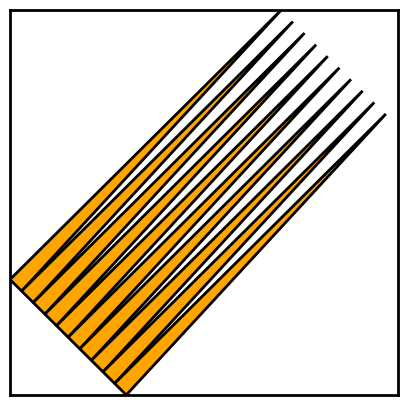

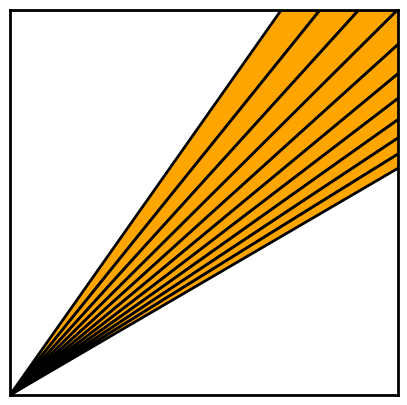

In [9]:
N = 10

karate_guys = [[(i*0.3/(N),0.3-i*0.3/(N)),((i+1)*0.3/(N),0.3-(i+1)*0.3/(N)),(1-0.3+i*0.3/(N),1-i*0.3/(N))] for i in range(N)]

fan_guys = [[(0,0),(0.7+i/N,1),(0.7+(i+1)/N,1)] for i in range(N)]

visualize_polygons(karate_guys)
visualize_polygons(fan_guys)